In [39]:
import numpy as np
import pandas as pd


## plotting libraries
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


import math
import random
import statistics as stats
import statsmodels.api as sma
from scipy.stats import boxcox
from scipy.stats import norm


# scaler
from sklearn.preprocessing import StandardScaler


## Sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


pd.options.display.max_rows = 100


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')

In [8]:
churnData

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No          No          No   
1               Yes           No              Yes          No          No   
2               Yes          Yes               No          No          No   
3               Yes           No              Yes         Yes          No   
4                No           No               No          No          No   
...             ...          ...              ...         ...         ...   
7038            Yes           No              Yes         Yes         Yes   
7039             No          Yes              Yes          No         Yes   
7040            Yes           No               No          No          No   
7041             No           No               No          No          No   
7042            Yes           No              Yes         Yes         Yes   

     StreamingMovies        Contract  MonthlyCharges TotalCharges Churn  
0                 No  Month-to-month           29.85        29.85    No  
1                 No        One year           56.95       1889.5    No  
2                 No  Month-to-month           53.85       108.15   Yes  
3                 No        One year           42.30      1840.75    No  
4                 No  Month-to-month           70.70       151.65   Yes  
...              ...             ...             ...          ...   ...  
7038             Yes        One year           84.80       1990.5    No  
7039             Yes        One year          103.20       7362.9    No  
7040              No  Month-to-month           29.60       346.45    No  
7041              No  Month-to-month           74.40        306.6   Yes  
7042             Yes        Two year          105.65       6844.5    No  

[7043 rows x 16 columns]

In [7]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
# convert TotalCharges to numeric
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [15]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
# check for NaN values for whole df
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# check for NaN values in one column
churnData["TotalCharges"].isna().sum()

11

In [25]:
# remove NaN
churnData.dropna(subset=["TotalCharges"], inplace=True)

### Split the data into a training set and a test set

In [27]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

In [35]:
y.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [44]:
y = y.map(lambda x: 1 if x == 'Yes' else 0)

In [46]:
# split in X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
# Scale the features either by using normalizer or a standard scaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # the standard scaler will only work with numericals
X_test = scaler.transform(X_test)

In [48]:
# Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
# let's first do it on one first
# then I will write a function that that this for 15 different K's
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

KNeighborsClassifier(n_neighbors=1)

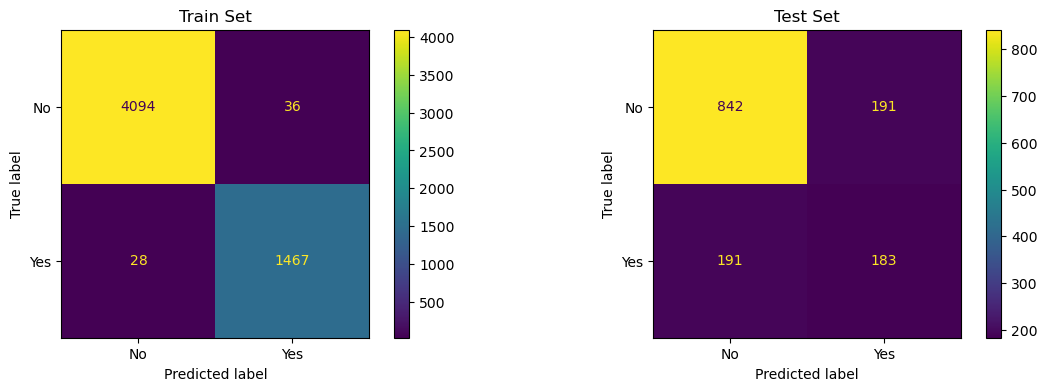

In [40]:
fig, ax = plt.subplots(1,2, figsize=(14,4))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# what is it that we get???


In [49]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [50]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

Error_metric  Train  Test
0     Accuracy   0.99  0.73
1    Precision   0.98  0.49
2       Recall   0.98  0.49

In [51]:
# now, write a function that does the above 15 times
# a for loop, right?


# i need this 
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)



# and I need this in the for loop, right?
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

# so, how do I combine these two?
    # I could run a counter and increase it by one each time
    

# but I also need to make sure that I store each df and give it a title with the number of k
    # it can be a list of df, which is a dict?
        # so, how do I convert a df into a df?
        


**FIRST PART OF THE LOOP**

model = KNeighborsClassifier(n_neighbors=1,weights='uniform')

model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

y_pred_train=model.predict(X_train)


**SECOND PART OF THE LOOP**

error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)

error_metrics_df



*so, how do I combine these two? I could run a counter and increase it by one each time*
    

*but I also need to make sure that I store each df and give it a title with the number of k. it can be a list of df, which is a dict? so, how do I convert a df into a df?*
        
*a list of dictionaries or can I maybe store dfs in a list?*

*this is list that would suffice my needs*

*I need to pass it the dfs and the number of k before each df*

*error_metrics_df_1 = error_metrics_df
error_metrics_df_2 = error_metrics_df
a_list_of_df = [1, error_metrics_df_1, 2, error_metrics_df_2]*

*so, for each k in range 15, a model with k neighbors shall be fitted, and the function 'evaluate_classification_model' shall be run, and each time the 'error_metrics_df' shall be stored in a list that 'prints' the counter before each df*

In [66]:
def compare_k():
    list_df = []
    for k in range(15):
        model = KNeighborsClassifier(n_neighbors = k+1,weights='uniform')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test) 
        y_pred_train=model.predict(X_train)
        error_metrics_df,y_train_vs_predicted, y_test_vs_predicted = evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
        list_df.append((k+1, error_metrics_df))
    return list_df

In [67]:
compare_k()

[(1,
    Error_metric  Train  Test
  0     Accuracy   0.99  0.73
  1    Precision   0.98  0.49
  2       Recall   0.98  0.49),
 (2,
    Error_metric  Train  Test
  0     Accuracy   0.86  0.77
  1    Precision   1.00  0.62
  2       Recall   0.49  0.30),
 (3,
    Error_metric  Train  Test
  0     Accuracy   0.86  0.75
  1    Precision   0.77  0.54
  2       Recall   0.67  0.46),
 (4,
    Error_metric  Train  Test
  0     Accuracy   0.84  0.77
  1    Precision   0.83  0.63
  2       Recall   0.50  0.36),
 (5,
    Error_metric  Train  Test
  0     Accuracy   0.84  0.76
  1    Precision   0.73  0.57
  2       Recall   0.61  0.45),
 (6,
    Error_metric  Train  Test
  0     Accuracy   0.83  0.77
  1    Precision   0.79  0.62
  2       Recall   0.50  0.37),
 (7,
    Error_metric  Train  Test
  0     Accuracy   0.83  0.77
  1    Precision   0.71  0.59
  2       Recall   0.59  0.47),
 (8,
    Error_metric  Train  Test
  0     Accuracy   0.82  0.78
  1    Precision   0.75  0.64
  2       Recall